# Functions

## Import libraries

In [35]:
# Pandas and Numpy
import pandas as pd
import numpy as np

# Maths
import math
from scipy import stats

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# plt.rcParams["figure.figsize"] = (16,8)
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D

# Feature Extraction
# PCA (Principal Component Analysis)
from sklearn.decomposition import PCA
# LDA (Linear Discriminant Analysis)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 

# Models
from sklearn.linear_model import LogisticRegression

## Load Example File

#### Original

In [36]:
churn= pd.read_csv("Churn_Clean.csv")
churn.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Int,Geography_Germany,Geography_Spain,Balance_Int
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,1,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,1,1


In [37]:
# Data
X = churn.drop(['Exited'],axis=1)
y = pd.DataFrame(churn['Exited'])

#### Standard

In [38]:
churn_norm= pd.read_csv("Churn_Norm.csv")
churn_norm.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Int,Geography_Germany,Geography_Spain,Balance_Int
0,0.538,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0,1.0,0.0,0.0,0.0
1,0.516,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0,1.0,0.0,1.0,1.0
2,0.304,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0,1.0,0.0,0.0,1.0
3,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0,1.0,0.0,0.0,0.0
4,1.000,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0,1.0,0.0,1.0,1.0


In [39]:
churn_norm.shape

(10000, 13)

In [40]:
# Data (normalized)
X_norm = churn_norm.drop(['Exited'],axis=1)
y_norm = pd.DataFrame(churn_norm['Exited'])

## PCA (Principal Component Analysis)

PCA (Principal Components Analysis) gives us our ideal set of features. It creates a set of principal components that are rank ordered by variance (the first component has higher variance than the second, the second has higher variance than the third, and so on), uncorrelated, and low in number (we can throw away the lower ranked components as they contain little signal).

In [41]:
def PCA_princ_comp(n,X):
    
    '''
    Function that finds the principal components of the analysis.
    '''
        
    pca = PCA(n_components=n)
    X_reduced = pca.fit_transform(X)
    
    n_comp = len(X_reduced[0])
    
    # Principal components
    princ_comp = []
    
    for pc in range(n_comp):
        princ_comp.append('PC'+str(pc+1))
        # print(princ_comp)
        
    # Reduced DataFrame composed by principal components and target
    df_reduced = pd.DataFrame(data=X_reduced, columns = princ_comp)

    return df_reduced

#### How to choose the number of components?

Typically, we want the explained variance to be between 95–99%.

In [42]:
def cumulative_variance(X,var=0.95):
    
    '''
    Function that prints the cumulative variance
    '''
    
    # Graph of the plot the cumulative variance.
    fig, ax = plt.subplots()
    xi = np.arange(1, X.shape[1]+1, step=1)
    # print(len(xi))

    # Curve
    pca = PCA(n_components=var)
    pca = PCA().fit(X)
    y = np.cumsum(pca.explained_variance_ratio_)
    #print(y)

    plt.ylim(0.0,1.1)
    plt.plot(xi, y, marker='o',ms=4, linestyle='-', color='#FDE725FF')

    plt.xlabel('Number of Components')
    plt.xticks(np.arange(0, X_norm.shape[1]+1, step=1)) 

    # Change from 0-based array index to 1-based human-readable label
    plt.ylabel('Cumulative variance (%)')
    plt.title('The number of components needed to explain variance', fontsize=12)

    plt.axhline(y=var, color='#440154FF', linestyle='-')
    plt.text(8.5, 0.9, '95% cut-off threshold', color = '#440154FF', fontsize=10)

    ax.grid(axis='x')
    plt.show()

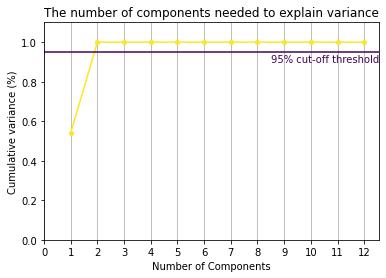

In [43]:
cumulative_variance(X);

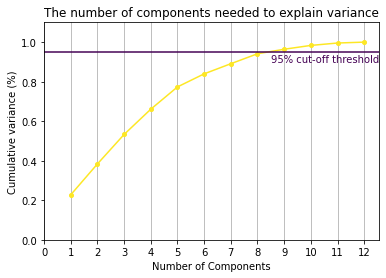

In [44]:
cumulative_variance(X_norm);

The number of components needed to explain variance are 1 fro the clean dataset and two for the normalized one.

#### Test PCA with scatter plot

Check if the PCA with 2 components could be a good variable-reduction technique with the clean dataset ('churn.csv').

In [45]:
# PCA churn dataset
pca = PCA(n_components=2)
pca.fit(X)
pc = pca.transform(X)
pc

array([[-76157.14598258,  -7194.7616373 ],
       [  8266.91041361, -11846.10562173],
       [ 83998.63333736,  -7340.13343812],
       ...,
       [-80759.55513085,  51889.55592605],
       [ -1965.60623473,   7070.42405288],
       [ 48687.71620051,  65879.53097881]])

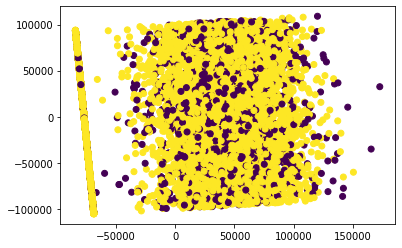

In [46]:
# Visualization
plt.scatter(pc[:,0],pc[:,1], c =churn.Exited, cmap='viridis_r');

PCA is NOT a good variable reduction technique because is not able to separate these twovariables.

#### Test PCA with logistic regression

Another method to confirm our intuition is to create the simplest model posible for our dataset and check how it works.

In [47]:
# Create a model of logistic regression
model = LogisticRegression()
model.fit(pc,y)
accurancy_PCA = model.score(pc,y)
print(f'Logistic regression has an accurancy of {round(accurancy_PCA*100)}%')

Logistic regression has an accurancy of 49.0%


D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [48]:
# model.predict(pc).sum()

In [49]:
print(f"The model only predicts {round(accurancy_PCA*100)}% of the customers behaviour.")

The model only predicts 49.0% of the customers behaviour.


#### Conclusion
PCA is NOT a good variable reduction technique.

## LDA (Linear Discriminant Analysis)

LDA (Linear Discriminant Analysis) is a supervised dimensionality reduction technique. LDA tries to reduce dimensions of the feature set while retaining the information that discriminates output classes.

In [50]:
def LDA_princ_comp(n,X,y):
    
    '''
    Function that finds the principal components of the analysis.
    '''

    # Create LDA
    lda = LDA(n_components=n)
    X_reduced = lda.fit_transform(X,y)
    # print(array_reduced)

    # Create list of Explained Variances
    lda_var_ratios = lda.explained_variance_ratio_

    if n == None:    
        return lda_var_ratios
    else:
    
        # Principal components
        princ_comp = []

        for pc in range(n):
            princ_comp.append('PC'+str(pc+1))
            #print(princ_comp)

        # Reduced DataFrame composed by principal components and target
        pd_reduced = pd.DataFrame(data=X_reduced, columns = princ_comp)
        
        return pd_reduced

In [51]:
# Initial values
n = None
churn_norm_LDA = LDA_princ_comp(n,X_norm, y_norm)
churn_norm_LDA

D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([1.])

How to choose the number of components?

Like PCA, we want the explained variance to be between 95–99%.

In [52]:
def select_n_components(var_ratio, goal_var):
    
    '''
    Function Calculating Number Of Components Required To Pass Threshold
    '''
    # Set initial variance explained so far
    total_variance = 0.0
    
    # Set initial number of features
    n_components = 0
    
    # For the explained variance of each feature:
    for explained_variance in var_ratio:
        
        # Add the explained variance to the total
        total_variance += explained_variance
        
        # Add one to the number of components
        n_components += 1
        
        # If we reach our goal level of explained variance
        if (total_variance)*100 >= goal_var:
            # End the loop
            break
            
    # Return the number of components
    return n_components

In [53]:
n_components = select_n_components(churn_norm_LDA, 95)
n_components

1

The LDA algorithm uses a number of components which is the minimum between the number of features and (n_classes-1).

In this case we only have 2 classes (customers that left the bank or not) so the LDA always reduct the variables to one component.

In [54]:
n_classes = len(churn.Exited.unique())
n_features = X_norm.shape[1]
print(f'Number of components <= min(n_features, (n_classes-1) for dimensionality reduction.')
print(f'Number of components <= {min(n_features, n_classes-1)}')

Number of components <= min(n_features, (n_classes-1) for dimensionality reduction.
Number of components <= 1


In [55]:
# Initial values normalized dataset
n = 1
churn_norm_LDA = LDA_princ_comp(n,X_norm, y_norm)
churn_norm_LDA.head()

D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


,PC1
0,-0.244017
1,-0.036741
2,0.868267
3,0.388012
4,-0.021615


#### Test LDA with Scatter Plot

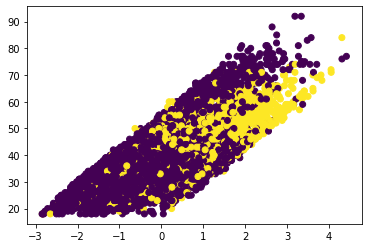

In [56]:
plt.scatter(churn_norm_LDA.PC1,churn.Age, c= churn.Exited);

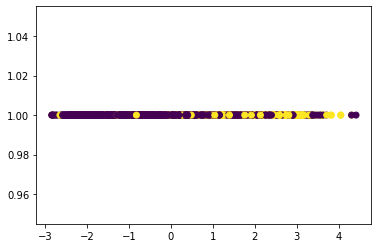

In [57]:
plt.scatter(churn_norm_LDA.PC1,np.ones(10000), c= churn.Exited);

LDA is a good variable reduction technique we can see a separation between the two variables.

#### Test the accurancy of the LDA 

In [58]:
lda = LDA(n_components=1)
lda.fit(X,y)
accurancy_LDA=lda.score(X,y)
print(f'LDA has an accurancy of {round(accurancy_LDA*100)}%')

LDA has an accurancy of 81.0%


D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [59]:
churn_col = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Gender_Int',
       'Geography_Germany', 'Geography_Spain', 'Balance_Int']

In [60]:
# Coefficients LDA
# Display vector values as floats
lda_coeff=['{:f}'.format(x) for x in lda.coef_[0]]
lda_coeff=[float(x) for x in lda_coeff]
lda_coeff= [abs(x) for x in lda_coeff]

The three most significant variables in absolute value for the calculation of the LDA are:

In [61]:
df = pd.DataFrame({'col':churn_col, 'coeff_LDA':lda_coeff})
df.sort_values(by='coeff_LDA', ascending=False)

,col,coeff_LDA
6,IsActiveMember,1.024435
9,Geography_Germany,0.912796
8,Gender_Int,0.540952
4,NumOfProducts,0.112701
1,Age,0.080577
5,HasCrCard,0.035680
11,Balance_Int,0.033205
10,Geography_Spain,0.029331
2,Tenure,0.013817
0,CreditScore,0.000682


#### Conclusion

In [62]:
print(f'LDA is a good variable reduction technique because it is able to separate these two groups of variables with an accurancy of the {round(accurancy_LDA*100)}%')

LDA is a good variable reduction technique because it is able to separate these two groups of variables with an accurancy of the 81.0%


#### Merge and export Dataframes

In [63]:
churn_LDA = pd.merge(churn,churn_norm_LDA, left_index=True, right_index=True)
churn_LDA.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Int,Geography_Germany,Geography_Spain,Balance_Int,PC1
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,0,-0.244017
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,1,1,-0.036741
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0.868267
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,0,0.388012
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,1,1,-0.021615


In [64]:
churn_LDA.to_csv('Churn_LDA.csv',index=False)

In [65]:
churn_norm_LDA = pd.merge(churn_norm,churn_norm_LDA, left_index=True, right_index=True)
churn_norm_LDA.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Int,Geography_Germany,Geography_Spain,Balance_Int,PC1
0,0.538,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0,1.0,0.0,0.0,0.0,-0.244017
1,0.516,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0,1.0,0.0,1.0,1.0,-0.036741
2,0.304,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0,1.0,0.0,0.0,1.0,0.868267
3,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0,1.0,0.0,0.0,0.0,0.388012
4,1.000,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0,1.0,0.0,1.0,1.0,-0.021615


In [66]:
churn_norm_LDA.to_csv('Churn_norm_LDA.csv',index=False)

### Note

Our dataset has got an **imbalance target** (80% of customer left the bank, 20% doesn't). Some resampling techniques will need to be used to balance the data.